<a href="https://colab.research.google.com/github/Grace663-08/cracking-the-market-code-with-ai-driven-stock-price-prediction-using-time-series-analysis-code/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.2725
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0984
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0895
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0964
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0871
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0924
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0856
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0890
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0824
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0891
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step
RMSE: 30.74
MAE: 26.77


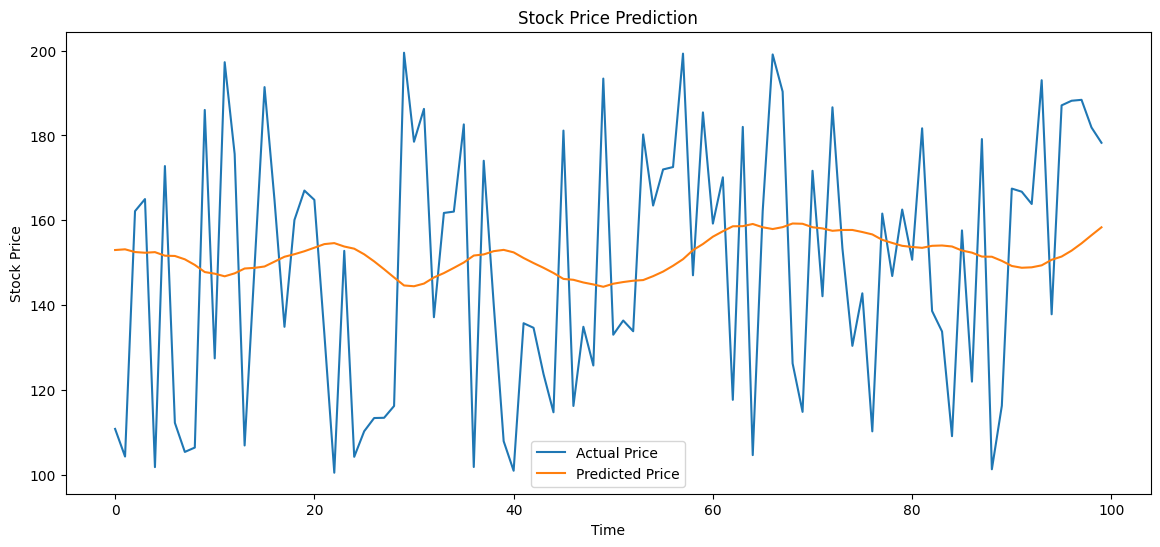

In [ ]:
# AI-Driven Stock Price Prediction Using Time Series Analysis (CSV-based)

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Load stock data from CSV (Corrected path)
data = pd.read_csv("/content/stock_data.csv")  # Make sure this path is correct for your environment

# Step 2: Prepare 'Date' and 'Close' column
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]
data.dropna(inplace=True)

# Step 3: Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Step 4: Create training and testing datasets
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

training_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:training_size]
test_data = data_scaled[training_size - 60:]

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape input to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 5: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Step 6: Make predictions and invert scaling
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 7: Evaluate the model
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Step 8: Plot actual vs predicted prices
plt.figure(figsize=(14,6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# New Section